资料:
http://blog.csdn.net/guyuealian/article/details/70995333  
http://blog.csdn.net/xuelabizp/article/details/51235403  
http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py  
http://www.cnblogs.com/pinard/p/6136914.html

## Adaboost

#### 概述

adaboost属于集成学习中的boosting(提升法),在集成学习中，集成学习 主要分为bagging算法(套袋法)和boosting算法(提升法),
它们的区别可以看另外一篇文章[RandomForest](https://github.com/linzhenpeng/machinelearning/blob/master/RandomForest/RandomForest.ipynb)

boosting学习中比较流行的算法还有:GBDT,Xgboost,lightGBM  
当基本分类器为决策树时 提升方法称为 提升树 (boosting tree)

#### adaboost理论

Boosting, 也称为增强学习或提升法，是一种重要的集成学习技术， 能够将预测精度仅比随机猜度略高的弱学习器增强为预测精度高的强学习器，这在直接构造强学习器非常困难的情况下，为学习算法的设计提供了一种有效的新思路和新方法。其中最为成功应用的是，Yoav Freund和Robert Schapire在1995年提出的AdaBoost算法。

AdaBoost是英文"Adaptive Boosting"（自适应增强）的缩写，它的自适应在于：前一个基本分类器被错误分类的样本的权值会增大，而正确分类的样本的权值会减小，并再次用来训练下一个基本分类器。同时，在每一轮迭代中，加入一个新的弱分类器，直到达到某个预定的足够小的错误率或达到预先指定的最大迭代次数才确定最终的强分类器。

Adaboost算法可以简述为三个步骤：
* （1）首先，是初始化训练数据的权值分布D1。假设有N个训练样本数据，则每一个训练样本最开始时，都被赋予相同的权值：w1=1/N。
* （2）然后，训练弱分类器hi。具体训练过程中是：如果某个训练样本点，被弱分类器hi准确地分类，那么在构造下一个训练集中，它对应的权值要减小；相反，如果某个训练样本点被错误分类，那么它的权值就应该增大。权值更新过的样本集被用于训练下一个分类器，整个训练过程如此迭代地进行下去。
* （3）最后，将各个训练得到的弱分类器组合成一个强分类器。各个弱分类器的训练过程结束后，加大分类误差率小的弱分类器的权重，使其在最终的分类函数中起着较大的决定作用，而降低分类误差率大的弱分类器的权重，使其在最终的分类函数中起着较小的决定作用。

换而言之，误差率低的弱分类器在最终分类器中占的权重较大，否则较小。

#### 算法过程

定训练集$(x_1,y_1),....,(x_n,y_n)$ ,其中$y_1\in\{1,-1\}$用于表示训练样本的类别标签,$i=1,...,N$.Adaboost的目的就是从训练数据中学习一系列的弱分类器或基本分类器,然后将这些弱分类器组合成一个强分类器.

**相关符号定义:**
* $D_t(i)$:训练样本集的权值分布
* $w_i$:每个训练样本的权值大小
* $h$:弱分类器
* $H$:基本分类器
* $H_final$:最终的强分类器
* $e$:误差率
* $\alpha_t$:弱分类器权重

**推导过程**
1. 首先,初始化训练数据的权值分布.每一个训练样本最开始时的都被赋予相同的权重:$w_i=\frac{1}{N}$,这样训练样本的初始化权值分布$D_i(i)$:
$$D_1(i)=(w_1,w_2,...,w_n)=(\frac{1}{N},...,\frac{1}{N})$$

2. 进行迭代$t=1,....T$
    a. 选取一个当前误差率最低的弱分类器h作为第t个基本分类器$Ht$并计算弱分类$h_t:X\to\{-1,1\}$,该弱分类器在分布$D_t$上的误差为:
    $$e_t=P(H_t(x_t)\neq y_i)=\sum_{i=1}^{N}w_{ti}I(H_t(x_t)\neq y_i)$$
    该式子表示$H_t(x)$在训练集上的误差率$e_t$就是被$H_t(x)$误分类样本的权值之和
    
    b. 计算该弱分类器在最终分类器中所占的权重:
    $$\alpha_t=\frac{1}{2}ln(\frac{1-e_t}{e_t})$$
    说明误差率越小的弱分类器所占的权值越大,对分类就越重要
    
    c. 更新训练样本的权值分布$D_{t+1}$
    $$D_{t+1}=(w_{t+1,1},w_{t+1,2},...,w_{t+1,N})$$
    $$D_{t+1}=\frac{w_{ti}exp(-\alpha_ty_iH_t(x_i))}{Z_t},i=1,2,...N$$  
    
     其中 $Z_t=\sum_{i=1}^{N}w_{ti}exp(-\alpha_ty_iH_t(x_i))$它使$D_{m+1}$成为一个概率分布
     
     需要注意到是$y_iH_t(x_i)$当分类器正确分类时为1,错误分类时为 -1,所以上面的公式等价于
     $$w_{t+1,i}=\begin{cases}
\frac{w_{ti}}{Z_t}e^{-\alpha_t},H_t(x_i)=y_i\\
\frac{w_{ti}}{Z_t}e^{\alpha_t},H_t(x_i)\neq y_i\\
\end{cases}
     $$
     这样当分类错误时 权值就会加大,分类正确的权值就缩小
3. 最后,按弱分类器权值$\alpha_t$组合各个弱分类器,即
     $$f(x)=\sum_{t=1}^{T}\alpha_tH_t(x)$$
     最终得到一个强分类器:
     $$H_{final}=sign(f(x))=sign(\sum_{t=1}^{T}\alpha_tH_t(x))$$
     
由于权重更新依赖雨$\alpha_t$而$\alpha$又依赖于错误率$e$所以我们可以推导出下面的公式
$$w_{t+1,i}=\begin{cases}
\frac{w_{t,i}}{2e_t},H_t(x_i)\neq y_i\\
\frac{w_{t,i}}{2(1-e_t)},H_t(x_i)= y_i\\
\end{cases}
     $$


#### 实例

我们使用最大深度为1的决策树作为adaboost的基本分类器构建adaboost,测试预测效果,并且与逻辑回归比较,这里使用最简单的鸢尾花作为测试数据,虽然是3个类别但是,对测试没有太大的影响

In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
iris=load_iris()

In [10]:
data=iris.data[:,0:2] #取前面两个特征 

In [13]:
x_train,x_test,y_train,y_test=train_test_split(data,iris.target,test_size=0.3,random_state=0)

In [15]:
std=StandardScaler().fit(x_train)

In [16]:
x_train_std=std.transform(x_train) #对数据做归一化

In [22]:
x_test_std=std.transform(x_test)   #同时也要对训练数据做归一化

构建最大深度为有1的决策树 使用的是信息增益做特征选择

In [23]:
tree=DecisionTreeClassifier(criterion="entropy",max_depth=1)

构建adaboost 基本分器是上面构建的树  总共30颗  学习率为 0.1

In [61]:
ada=AdaBoostClassifier(base_estimator=tree,n_estimators=30,learning_rate=0.1,random_state=0)

In [28]:
tree=tree.fit(x_train,y_train) #决策树的训练数据不需要归一化

In [29]:
y_train_pred=tree.predict(x_train)

In [30]:
y_test_pred=tree.predict(x_test)

In [32]:
tree_train=accuracy_score(y_train,y_train_pred)

In [33]:
tree_test=accuracy_score(y_test,y_test_pred)

看下最大深度为1的决策树在训练集和测试集上面的预测效果

In [34]:
tree_train

0.65714285714285714

In [35]:
tree_test

0.55555555555555558

同时我们测试下逻辑回归的分类效果(这里使用归一化后的训练数据)

In [38]:
lr=LogisticRegression(C=1000.0,random_state=0)

In [40]:
lr.fit(x_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [42]:
lr_train=lr.predict(x_train_std)

In [43]:
lr_test=lr.predict(x_test_std)

In [44]:
accuracy_score(y_train,lr_train)

0.82857142857142863

In [45]:
accuracy_score(y_test,lr_test)

0.73333333333333328

由于我们只使用了2个特征所以取得的效果不是很好,但是与逻辑回归相比,单层的决策树就要更差了,我们现在就使用这种弱分类器构建出一个强分类器

In [62]:
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=30, random_state=0)

In [63]:
y_ada_train=ada.predict(x_train)

In [64]:
y_ada_test=ada.predict(x_test)

In [65]:
accuracy_score(y_train,y_ada_train)

0.70476190476190481

In [66]:
accuracy_score(y_test,y_ada_test)

0.75555555555555554

可以看到相比单颗树,adaboost提升了不少,测试集的精度也比逻辑回归高

我们画出决策树和adaboost在所有数据上的分界线图

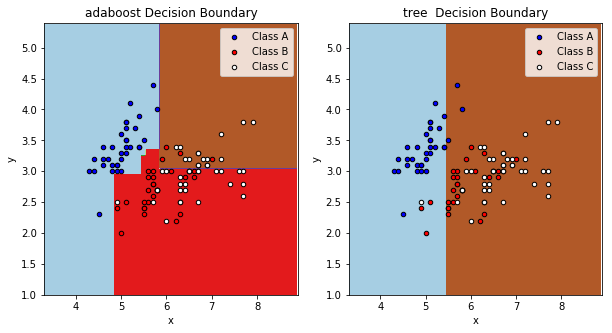

In [87]:
plot_colors = "brw"
plot_step = 0.02
class_names = "ABC"
plt.figure(figsize=(10, 5))
plt.subplot(121)
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
# Plot the training points
for i, n, c in zip(range(3), class_names, plot_colors):
    idx = np.where(y_train == i)
    plt.scatter(x_train[idx, 0], x_train[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('adaboost Decision Boundary')

plt.subplot(122)
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
# Plot the training points
for i, n, c in zip(range(3), class_names, plot_colors):
    idx = np.where(y_train == i)
    plt.scatter(x_train[idx, 0], x_train[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('tree  Decision Boundary')



plt.show()

观察决策区域,我们可以看到adaboost 的决策区域比单层决策树的决策区域复杂得多.